In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes = pd.read_csv('diabetic_data.csv')

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
# to keep only columns of interest(demographic data and medications)
diabetes = diabetes.loc[:, ~diabetes.columns.isin(['encounter_id','patient_nbr','weight','admission_type_id',
                                                   'discharge_disposition_id','admission_source_id','payer_code',
                                                   'medical_specialty','diag_1','diag_2','diag_3','number_diagnoses',
                                                   'max_glu_serum','A1Cresult','change','diabetesMed'])]

In [6]:
diabetes.age = diabetes.age.str[1:-1]

In [7]:
diabetes.loc[0:100000:10000]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,Caucasian,Female,0-10,1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
10000,Caucasian,Female,80-90,9,61,1,14,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
20000,Caucasian,Male,60-70,9,56,2,30,0,0,1,...,No,No,No,Steady,No,No,No,No,No,>30
30000,Caucasian,Male,40-50,4,37,2,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
40000,Caucasian,Female,40-50,2,39,3,18,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
50000,Caucasian,Female,60-70,4,43,0,13,1,0,0,...,No,No,No,Steady,No,No,No,No,No,>30
60000,Caucasian,Male,40-50,2,37,0,16,0,0,3,...,No,No,No,Steady,No,No,No,No,No,NO
70000,Other,Male,40-50,2,55,1,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
80000,Caucasian,Male,70-80,1,22,6,17,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
90000,AfricanAmerican,Male,50-60,2,48,0,17,0,1,1,...,No,No,No,Down,No,No,No,No,No,NO


In [8]:
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [9]:
diabetes.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [10]:
diabetes.age.value_counts()

70-80     26068
60-70     22483
50-60     17256
80-90     17197
40-50      9685
30-40      3775
90-100     2793
20-30      1657
10-20       691
0-10        161
Name: age, dtype: int64

In [11]:
diabetes.drop(diabetes[diabetes.race == '?'].index, inplace = True)

In [12]:
diabetes.drop(diabetes[diabetes.gender == 'Unknown/Invalid'].index, inplace = True)

In [13]:
grouped = diabetes.groupby(['readmitted','race'])
grouped.size()

readmitted  race           
<30         AfricanAmerican     2155
            Asian                 65
            Caucasian           8592
            Hispanic             212
            Other                145
>30         AfricanAmerican     6634
            Asian                161
            Caucasian          27124
            Hispanic             642
            Other                446
NO          AfricanAmerican    10421
            Asian                415
            Caucasian          40383
            Hispanic            1183
            Other                914
dtype: int64

In [14]:
readmitted_race = pd.crosstab(index=diabetes.race, columns=diabetes.readmitted)
readmitted_race

readmitted,<30,>30,NO
race,,,
AfricanAmerican,2155,6634,10421
Asian,65,161,415
Caucasian,8592,27124,40383
Hispanic,212,642,1183
Other,145,446,914


In [15]:
readmitted_gender = pd.crosstab(index=diabetes.gender, columns=diabetes.readmitted)
readmitted_gender

readmitted,<30,>30,NO
gender,,,
Female,6061,19257,28257
Male,5108,15750,25059


In [16]:
readmitted_age = pd.crosstab(index=diabetes.age, columns=diabetes.readmitted)
readmitted_age

readmitted,<30,>30,NO
age,,,
0-10,3,26,131
10-20,40,222,420
20-30,232,502,877
30-40,422,1175,2102
40-50,1009,3238,5218
50-60,1646,5840,9409
60-70,2469,7785,11734
70-80,3018,9307,13143
80-90,2028,6118,8654


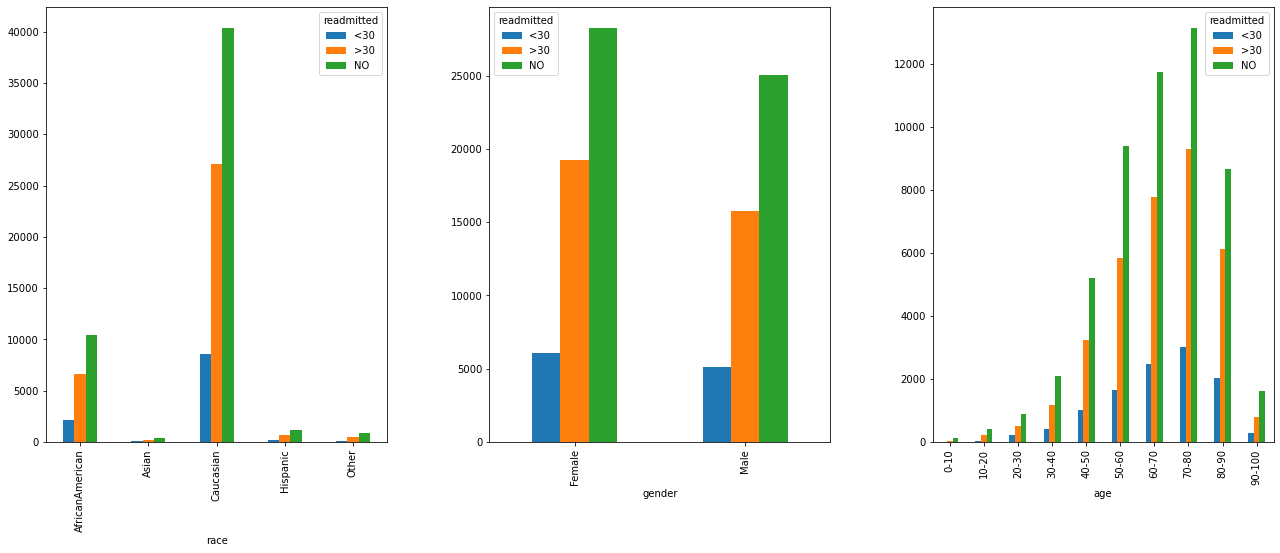

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22,8))
readmitted_race.plot.bar(ax=ax[0])
readmitted_gender.plot.bar(ax=ax[1])
readmitted_age.plot.bar(ax=ax[2])
plt.subplots_adjust(wspace=0.3)

In [18]:
readmitted_metformin = pd.crosstab(index=diabetes.metformin, columns=diabetes.readmitted)
readmitted_repaglinide = pd.crosstab(index=diabetes.repaglinide, columns=diabetes.readmitted)


readmitted,<30,>30,NO
metformin,,,
Down,68,187,307
No,9267,28406,42298
Steady,1748,6072,10100
Up,86,342,611


In [17]:
round(diabetes.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,99492.0,4.40,2.99,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,99492.0,43.07,19.70,1.0,31.0,44.0,57.0,132.0
num_procedures,99492.0,1.34,1.70,0.0,0.0,1.0,2.0,6.0
num_medications,99492.0,16.03,8.12,1.0,10.0,15.0,20.0,81.0
number_outpatient,99492.0,0.37,1.28,0.0,0.0,0.0,0.0,42.0
number_emergency,99492.0,0.20,0.94,0.0,0.0,0.0,0.0,76.0
number_inpatient,99492.0,0.64,1.27,0.0,0.0,0.0,1.0,21.0


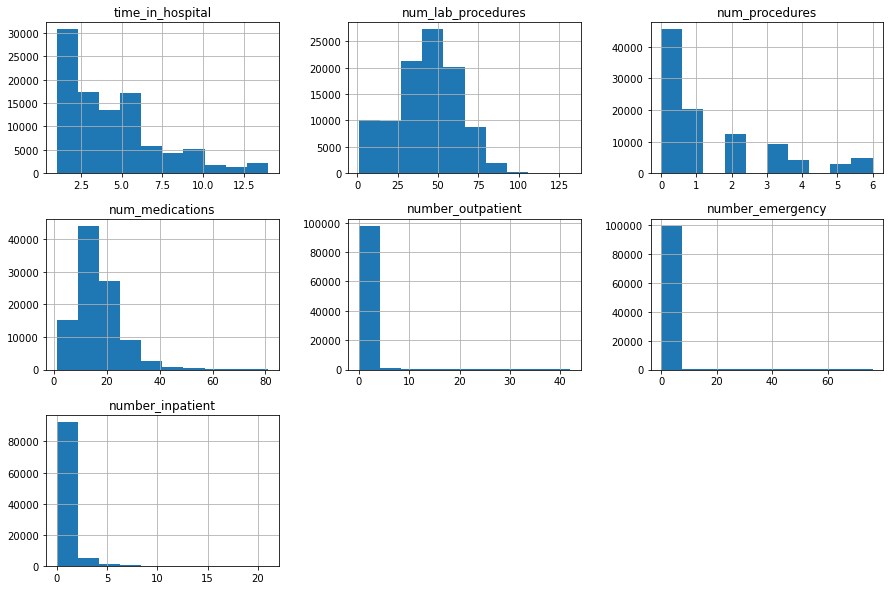

In [18]:
diabetes.hist(figsize=(15,10))
plt.show()

number_outpatient, number_emergency and number_inpatient are severly right skewed - need to be normalized 


graphs below to magnify on the tails - no obvious outliers

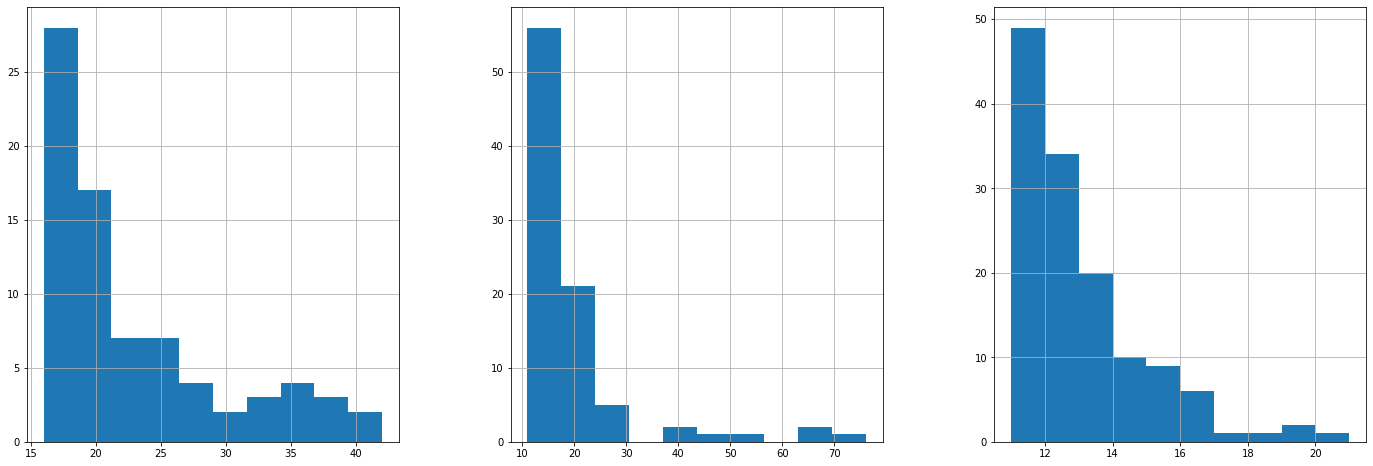

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
diabetes.loc[diabetes.number_outpatient>15].number_outpatient.hist(ax=ax[0])
diabetes.loc[diabetes.number_emergency>10].number_emergency.hist(ax=ax[1])
diabetes.loc[diabetes.number_inpatient>10].number_inpatient.hist(ax=ax[2])
plt.subplots_adjust(wspace=0.3)

In [172]:
med_cols = diabetes.columns[10:-1]

df = []
for i in med_cols:
    df.append(pd.crosstab(index=diabetes[i], columns=diabetes.readmitted))

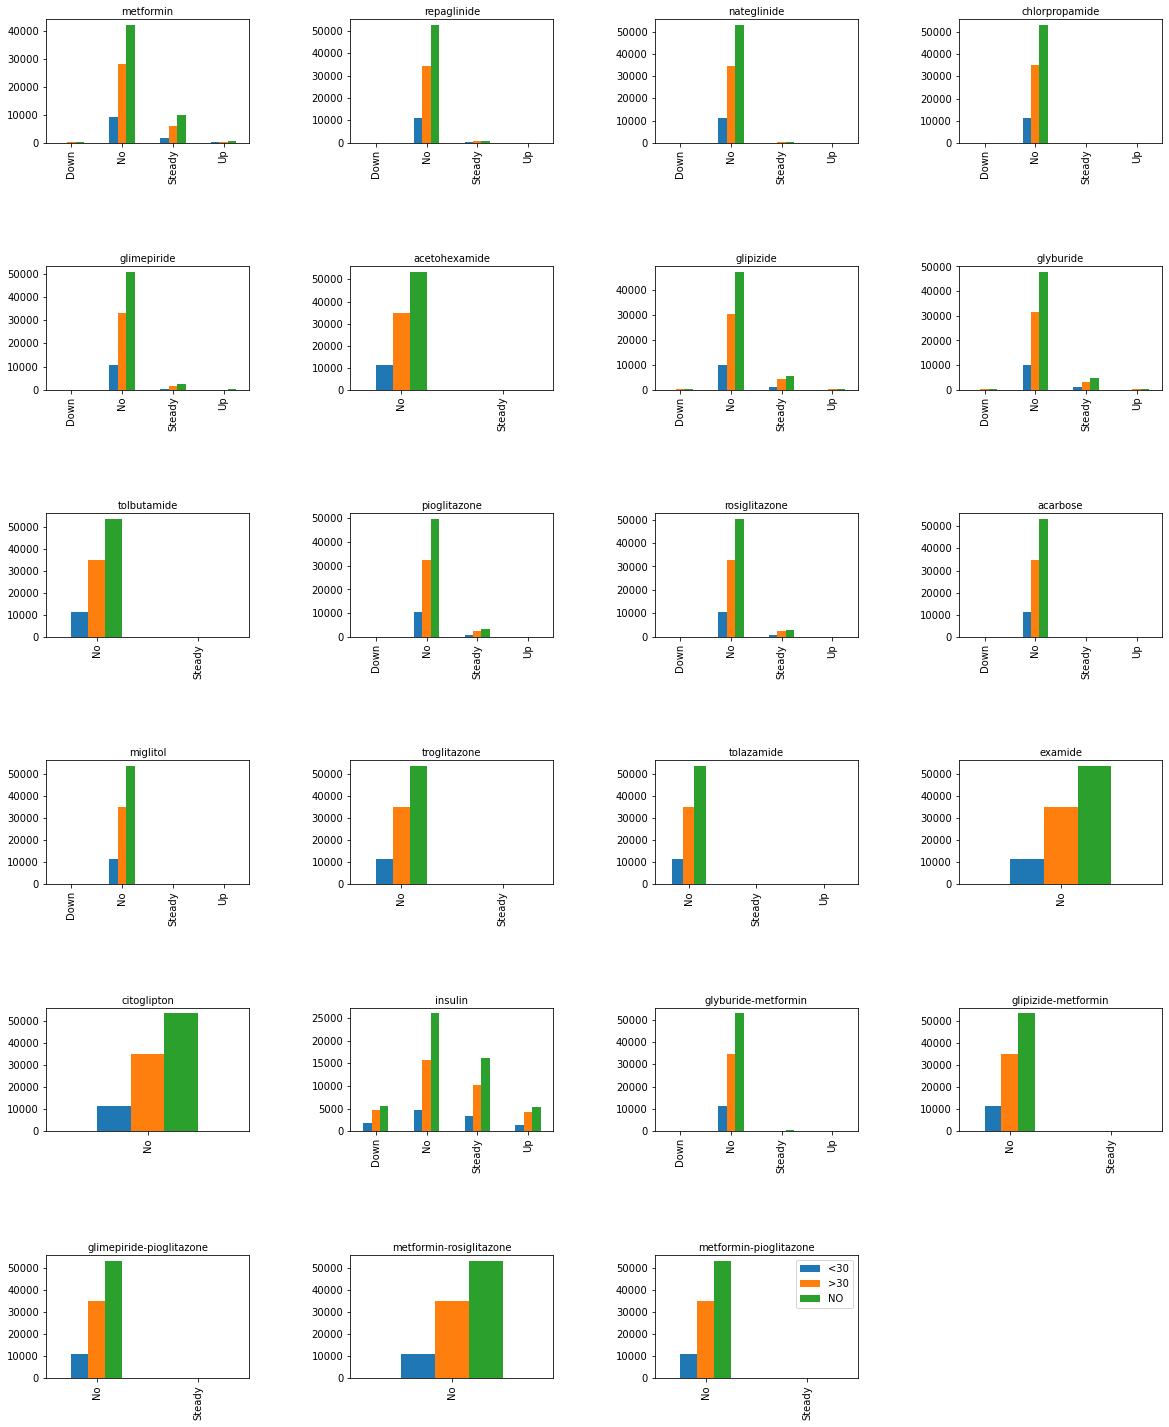

In [180]:
fig = plt.subplots(figsize=(20,25))
plt.subplots_adjust(hspace=1, wspace=0.5)

for i in range(len(df)):
    ax = plt.subplot(6, 4, i + 1)
    ax.xaxis.set_label_position('top')
    df[i].plot.bar(ax=ax,legend=0)

handles, labels = ax.get_legend_handles_labels()  
plt.legend(labels, loc='upper right')

tuple